# Download dataset from Kaggle

In [1]:
pip install kaggle

In [1]:
import os
from google.colab import files

# 上傳 kaggle.json
files.upload()

# 創建 kaggle 資料夾並移動 API 憑證
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# 設定權限
!chmod 600 ~/.kaggle/kaggle.json



Saving kaggle.json to kaggle.json


In [2]:
!kaggle competitions download -c positive-negative-text-polarity-classification-25
!unzip positive-negative-text-polarity-classification-25.zip -d ./dataset

positive-negative-text-polarity-classification-25.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  positive-negative-text-polarity-classification-25.zip
replace ./dataset/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./dataset/test_no_answer_2022.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./dataset/train_2022.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
import pandas as pd

dataset_path = "./dataset"

train_file = "train_2022.csv"
df_train = pd.read_csv(os.path.join(dataset_path, train_file))

test_file = "test_no_answer_2022.csv"
df_test = pd.read_csv(os.path.join(dataset_path, test_file))

print(df_train)
print(df_test)

      row_id                                               TEXT  LABEL
0          0  director dirk shafer and co-writer greg hinton...      0
1          1  a charming , quirky and leisurely paced scotti...      1
2          2  the price was good ,  and came quickly though ...      1
3          3  i was looking forward to this game for a coupl...      0
4          4  arguably the year 's silliest and most incoher...      0
...      ...                                                ...    ...
1995    1995                  an imaginative comedy\/thriller .      1
1996    1996  a savvy exploration of paranoia and insecurity...      1
1997    1997  on the other hand for power grating you ve got...      1
1998    1998  like dickens with his passages , mcgrath craft...      1
1999    1999  those who would follow haneke on his creepy ex...      1

[2000 rows x 3 columns]
       row_id                                               TEXT
0           0   good to know if you can t find these elsew

 1 being positive and 0 being negative.

# EDA

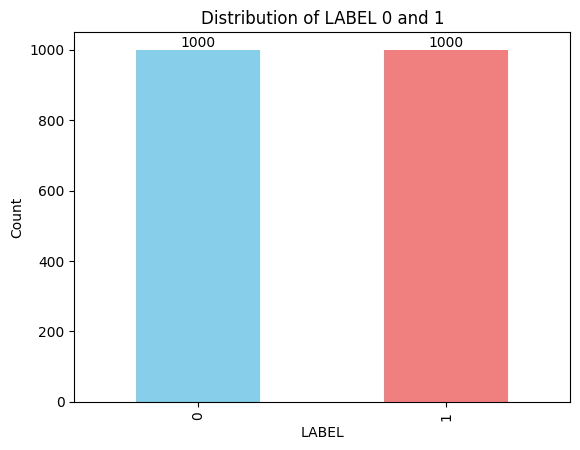

In [ ]:
import matplotlib.pyplot as plt

# 計算LABEL為0和1的數量
label_counts = df_train['LABEL'].value_counts()

# 繪製長條圖
ax = label_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

# 在每個條形上方顯示數字
for i, count in enumerate(label_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

# 設定標題和標籤
plt.title('Distribution of LABEL 0 and 1')
plt.xlabel('LABEL')
plt.ylabel('Count')

# 顯示圖形
plt.show()


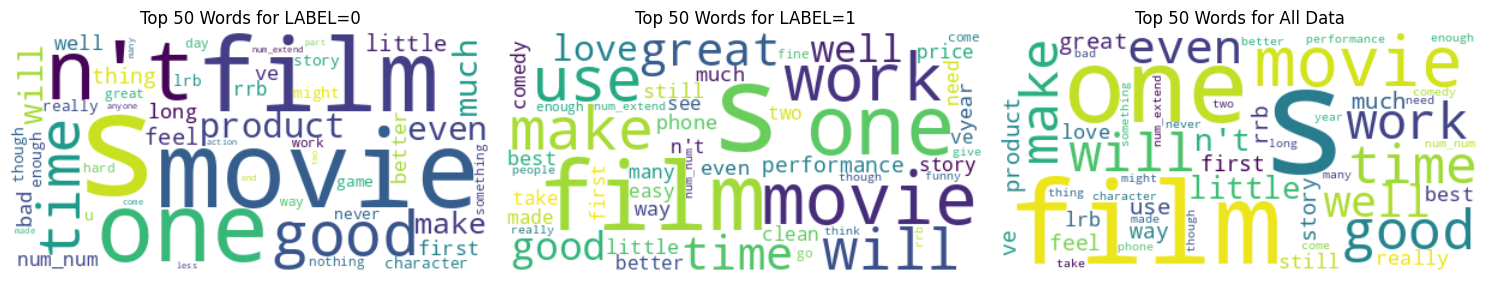

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# 假設 'self_intro' 是你要進行詞雲分析的欄位
# 篩選LABEL為0和1的資料
df_label_0 = df_train[df_train['LABEL'] == 0]
df_label_1 = df_train[df_train['LABEL'] == 1]

# 合併所有文本內容
text_label_0 = " ".join(df_label_0['TEXT'])
text_label_1 = " ".join(df_label_1['TEXT'])
text_all = " ".join(df_train['TEXT'])

# 創建詞雲
wordcloud_label_0 = WordCloud(max_words=50, background_color="white").generate(text_label_0)
wordcloud_label_1 = WordCloud(max_words=50, background_color="white").generate(text_label_1)
wordcloud_all = WordCloud(max_words=50, background_color="white").generate(text_all)

# 顯示詞雲
plt.figure(figsize=(15, 10))

# 顯示LABEL=0的詞雲
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_label_0, interpolation='bilinear')
plt.axis('off')
plt.title('Top 50 Words for LABEL=0')

# 顯示LABEL=1的詞雲
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_label_1, interpolation='bilinear')
plt.axis('off')
plt.title('Top 50 Words for LABEL=1')

# 顯示整體資料集的詞雲
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Top 50 Words for All Data')

# 顯示所有詞雲
plt.tight_layout()
plt.show()


# Modeling

In [5]:
pip install transformers torch sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
!pip install --upgrade transformers datasets


In [9]:
pip install accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [5]:
import pandas as pd
from sklearn.model_selection import KFold
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import EarlyStoppingCallback

# 使用 BERT 分詞器
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 定義 Dataset 類別
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = self.texts[item]
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 設置十折交叉驗證
kf = KFold(n_splits=10, shuffle=True, random_state=42)


# 訓練過程設定
training_args = TrainingArguments(
    output_dir='./results',          # 結果存放位置
    num_train_epochs=3,              # 訓練迭代次數
    per_device_train_batch_size=8,   # 訓練集批次大小
    per_device_eval_batch_size=16,   # 驗證集批次大小
    warmup_steps=500,                # 預熱步數
    weight_decay=0.01,               # L2正則化
    logging_dir='./logs',            # 日誌存放位置
    logging_steps=50,                # 每50步顯示一次訓練狀態
    save_strategy="steps",           # 每多少步驟保存模型
    save_steps=500,                  # 每500步保存一次
    load_best_model_at_end=True,     # 取得最佳模型
    metric_for_best_model="accuracy",# 根據準確率選擇最佳模型
    eval_steps=100,                  # 每100步進行一次驗證
    evaluation_strategy="steps",     # 每100步進行一次驗證
    disable_tqdm=False,              # 顯示進度條
)


# 早停回調
early_stopping = EarlyStoppingCallback(early_stopping_patience=2)

# 開始十折交叉驗證
for fold, (train_idx, val_idx) in enumerate(kf.split(df_train)):
    print(f"Training fold {fold + 1}")

    # 切分訓練集與驗證集
    train_data = df_train.iloc[train_idx]
    val_data = df_train.iloc[val_idx]

    train_dataset = TextDataset(train_data['TEXT'].values, train_data['LABEL'].values, tokenizer)
    val_dataset = TextDataset(val_data['TEXT'].values, val_data['LABEL'].values, tokenizer)

    # 載入 BERT 模型
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    # 訓練器設定
    trainer = Trainer(
        model=model,                     # 模型
        args=training_args,              # 訓練配置
        train_dataset=train_dataset,     # 訓練集
        eval_dataset=val_dataset,        # 驗證集
        callbacks=[early_stopping],      # 早停回調
    )

    # 訓練
    trainer.train()

    # 在每個fold後顯示訓練的結果（例如loss）
    print(f"Training results for fold {fold + 1}:")
    print(f"Loss: {trainer.state.log_history[-1]['loss']}")
    print(f"Validation accuracy: {trainer.state.log_history[-1]['eval_accuracy']}")


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [13]:
import transformers
print(transformers.__version__)


4.51.3


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 使用 GPU（如果可用）

print(f"使用設備: {device}")



使用設備: cuda


In [9]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW
from sklearn.model_selection import KFold, train_test_split
import numpy as np

# 假設你已經有資料
texts = df_train["TEXT"]
labels = df_train["LABEL"]

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 編碼文本
encodings = tokenizer(texts.tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

# 創建 TensorDataset
dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(labels.tolist()))

# 設置設備
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 創建 KFold 交叉驗證
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 設置 EarlyStopping
class EarlyStopping:
    def __init__(self, patience=2, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = np.inf
        self.counter = 0

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1

        if self.counter >= self.patience:
            print("Early stopping!")
            return True
        return False

# 訓練過程
def train(model, train_loader, optimizer, device):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = tuple(b.to(device) for b in batch)  # 移動到GPU
        input_ids, attention_mask, labels = batch

        optimizer.zero_grad()

        # 正向傳播
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        # 反向傳播
        loss.backward()
        optimizer.step()

    return total_loss / len(train_loader)

def evaluate(model, val_loader, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for batch in val_loader:
            batch = tuple(b.to(device) for b in batch)  # 移動到GPU
            input_ids, attention_mask, labels = batch

            # 正向傳播
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            # 計算準確度
            preds = torch.argmax(outputs.logits, dim=1)
            correct += (preds == labels).sum().item()

    return total_loss / len(val_loader), correct / len(val_loader.dataset)

# 創建 DataLoader
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(dataset, batch_size=8)

# 訓練過程
epochs = 3
early_stopping = EarlyStopping(patience=2, min_delta=0.01)  # 早停設置
for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f"Training fold {fold + 1}")

    # 切分訓練集和驗證集
    train_data = torch.utils.data.Subset(dataset, train_idx)
    val_data = torch.utils.data.Subset(dataset, val_idx)

    train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=8)

    # 初始化模型
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=1e-5)

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}:")
        train_loss = train(model, train_loader, optimizer, device)
        val_loss, val_accuracy = evaluate(model, val_loader, device)

        print(f"  Train Loss: {train_loss}")
        print(f"  Validation Loss: {val_loss}")
        print(f"  Validation Accuracy: {val_accuracy}")

        # 早停檢查
        if early_stopping(val_loss):
            break


Training fold 1


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1:
  Train Loss: 0.5807577576239904
  Validation Loss: 0.4338236308097839
  Validation Accuracy: 0.8
Epoch 2:
  Train Loss: 0.367853395111031
  Validation Loss: 0.3725203496217728
  Validation Accuracy: 0.825
Epoch 3:
  Train Loss: 0.22802812693019708
  Validation Loss: 0.41344875827431676
  Validation Accuracy: 0.855
Training fold 2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1:
  Train Loss: 0.5964951835738288
  Validation Loss: 0.4825296473503113
  Validation Accuracy: 0.78
Early stopping!
Training fold 3


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1:
  Train Loss: 0.5745287962092294
  Validation Loss: 0.4700439560413361
  Validation Accuracy: 0.805
Early stopping!
Training fold 4


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1:
  Train Loss: 0.6161990098820792
  Validation Loss: 0.5219039070606232
  Validation Accuracy: 0.715
Early stopping!
Training fold 5


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1:
  Train Loss: 0.5870019094149271
  Validation Loss: 0.4401023268699646
  Validation Accuracy: 0.765
Early stopping!
Training fold 6


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1:
  Train Loss: 0.5852375478876961
  Validation Loss: 0.5138476991653442
  Validation Accuracy: 0.76
Early stopping!
Training fold 7


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1:
  Train Loss: 0.6070874559879303
  Validation Loss: 0.552066233754158
  Validation Accuracy: 0.715
Early stopping!
Training fold 8


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1:
  Train Loss: 0.5736363079812792
  Validation Loss: 0.4531385350227356
  Validation Accuracy: 0.78
Early stopping!
Training fold 9


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1:
  Train Loss: 0.5986208475960626
  Validation Loss: 0.4833132004737854
  Validation Accuracy: 0.75
Early stopping!
Training fold 10


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1:
  Train Loss: 0.5985871318976085
  Validation Loss: 0.4666618764400482
  Validation Accuracy: 0.78
Early stopping!


In [10]:
# 保存最好的模型
model.save_pretrained("./best_model")
tokenizer.save_pretrained("./best_model")


('./best_model/tokenizer_config.json',
 './best_model/special_tokens_map.json',
 './best_model/vocab.txt',
 './best_model/added_tokens.json')

In [15]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd

# 載入已保存的模型和分詞器
model = BertForSequenceClassification.from_pretrained("./best_model")
tokenizer = BertTokenizer.from_pretrained("./best_model")

# 設置設備（GPU 或 CPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 批次預測
def predict_batch(texts, batch_size=8):
    all_preds = []
    # 將文本分批次處理
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]

        # 編碼文本
        encodings = tokenizer(batch_texts, padding=True, truncation=True, max_length=128, return_tensors='pt')
        input_ids = encodings['input_ids'].to(device)
        attention_mask = encodings['attention_mask'].to(device)

        # 模型預測
        model.eval()  # 設置模型為評估模式
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        # 取得預測的類別（通常是 logit 值最大的類別）
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)

    return all_preds

# 預測 df_test 中的文本
test_texts = df_test["TEXT"].tolist()  # 假設你的測試集有 "TEXT" 這個欄位
predictions = predict_batch(test_texts, batch_size=8)  # 批次大小可以調整

# 將預測結果存儲到 DataFrame 中
df_test['LABEL'] = predictions

# 查看結果
df_test


,row_id,TEXT,LABEL
0,0,good to know if you can t find these elsewhere .,1
1,1,love it ! the grill plates come out and pop i...,1
2,2,i m convinced this was a poorly executed refur...,0
3,3,i would never have complained about that if it...,0
4,4,"the photo shows the same whole , large candie...",1
...,...,...,...
10995,10995,i didn t quite get it the first time .,0
10996,10996,i ve tried installing with and without the oem...,1
10997,10997,i was parked at a truck stop in the cincinnati...,0
10998,10998,i recently bought this case after seeing some ...,1


In [16]:
from google.colab import files

df_test_result = df_test[['row_id', 'LABEL']]

df_test_result.to_csv("0429testing.csv", index=False)
files.download("0429testing.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>